In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# read image 
img = cv2.imread('./images/ms_dhoni/3243.1512975565.jpg')
img.shape

(225, 240, 3)

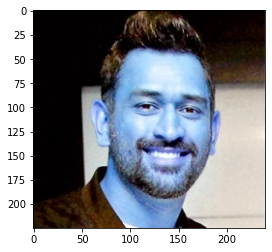

In [3]:
# display the image (RBG)
plt.imshow(img)

In [4]:
# gray scale image 
grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
grayscale.shape

(225, 240)

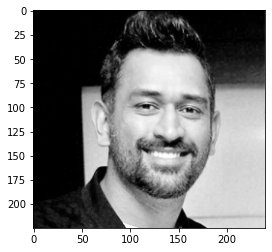

In [5]:
plt.imshow(grayscale, cmap='gray')

In [6]:
# face and eyes detection
# face_cascade xml loaded from opencv folder 
face_cascade = cv2.CascadeClassifier('./opencv/haarcascade_frontalface.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(grayscale, 1.3, 5)
faces # retun an array [x,y,width, height]

array([[ 64,  44, 145, 145]], dtype=int32)

In [7]:
# storing the first value i.e face detection array
(x,y,w,h) = faces[0]
x,y,w,h

(64, 44, 145, 145)

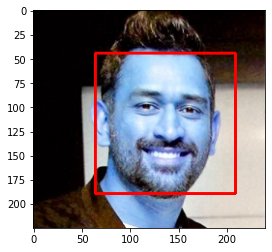

In [8]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

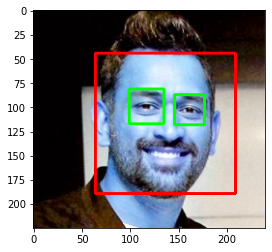

In [9]:
# eye detection
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = grayscale[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

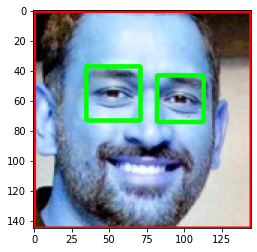

In [10]:
# image crop 
plt.imshow(roi_color, cmap='gray')

In [11]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

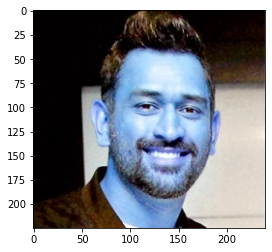

In [12]:
original_image = cv2.imread('./images/ms_dhoni/3243.1512975565.jpg')
plt.imshow(original_image)

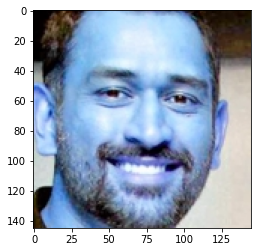

In [13]:
cropped_image = get_cropped_image_if_2_eyes('./images/ms_dhoni/3243.1512975565.jpg')
plt.imshow(cropped_image)

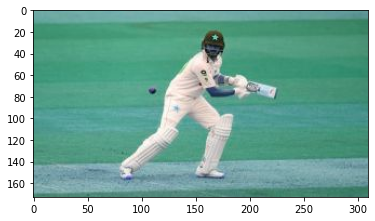

In [14]:
org_image_obstructed = cv2.imread('./images/ms_dhoni/46.jpg')
plt.imshow(org_image_obstructed)

In [15]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./images/43.jpg')
cropped_image_no_2_eyes
# no output as two eyes clearly not detected. 

[]

In [21]:
import shutil
path_to_cr_data = "./cropped_images/"
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)